<a href="https://colab.research.google.com/github/codenavy94/DeepLearningStudy/blob/main/Intro_to_Sentence_Embeddings_with_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers

     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 3.8 MB 25.4 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 6.5 MB 22.3 MB/s 
     |████████████████████████████████| 895 kB 46.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=853aa7ee88bb7ed291f05d7e795c0d1634e32a3191811706a0caf7e5dcb7d6ef
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')
model

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [14]:
sentences = [
             "the fifty mannequin heads floating in the pool kind of freaked them out",
             "she swore she just saw her sushi move",
             "he embraced his new life as an eggplant",
             "my dentist tells me that chewing bricks is very bad for your teeth",
             "the dental specialist recommended an immediate stop to flossingw with construction materials"
]

In [15]:
embeddings = model.encode(sentences)
embeddings

array([[-0.1889354 ,  0.18380447, -0.5132147 , ..., -0.9622859 ,
         0.16144831, -0.18547618],
       [-0.02548051, -0.06504342,  0.8549073 , ..., -0.082973  ,
        -0.26982787, -0.09522342],
       [-0.05365555, -0.10092876,  0.99919367, ...,  1.135775  ,
         0.01794519, -0.24008031],
       [ 0.21320145,  1.8518624 ,  0.3661923 , ...,  0.007353  ,
         0.31327727,  0.41728273],
       [ 0.18142867,  1.4221987 ,  1.048838  , ..., -0.01721176,
        -0.32797682,  0.35157526]], dtype=float32)

In [16]:
embeddings.shape

(5, 768)

In [17]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[1.00000048, 0.        , 0.        , 0.        , 0.        ],
       [0.40914333, 1.00000012, 0.        , 0.        , 0.        ],
       [0.1090903 , 0.44547975, 0.99999994, 0.        , 0.        ],
       [0.50074869, 0.30693942, 0.20791662, 0.9999997 , 0.        ],
       [0.28493279, 0.39745069, 0.30142066, 0.64019167, 0.99999958]])

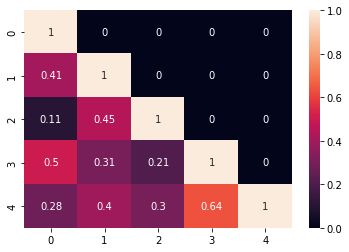

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True)

In [19]:
model = SentenceTransformer('all-mpnet-base-v2')
model

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

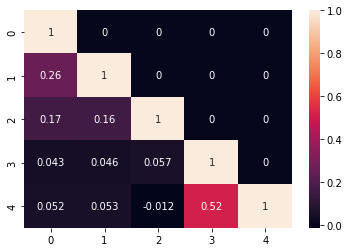

In [20]:
embeddings = model.encode(sentences)

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])

sns.heatmap(sim, annot=True)